# For Plans Started in Jan 2021 - Jun 2021

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dgpylib import dg_athena
from dgpylib import dg_s3 
import os
import re
from dateutil.relativedelta import relativedelta

import sys
sys.path.insert(0, '../EDA')
import basicstatsandplotter as bstatsplot

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# query_result = conn.read(query)
# query_result

In [4]:
conn1 = dg_s3.Connect('dgdatadump/DS&CA/Pricing/02 Projects/2022/Tel_Reg_2.0/Cancellation Model')

In [5]:
raw_df = conn1.read('TelReg_Canx_dedup.csv') #TelReg_Canx_dedup

raw_df.head()

,offerreferencenumber,offereffectivedatetime,offereffectiveweek,offeracceptedprice,offerbusinesseventcode,offerpostcode,offeracceptedindicator,sale,offertotalprice,persongoldencopyid,itemgoldencopyid,itemeventuserid,contractcreateddate,contractstatuscode,contractcompanycode,contractschemecode,contractnumber,contractstatusname,contractenddate,contractmovementdate,contractoriginalstartdate,contractdimensionid,contracteventdatetime,itemcategoryname,itemsupercategorycode,itemgoodscategoryname,manufacturerbrandname,manufacturergroupname,itemmodelnumber,itempurchaseprice,itempurchasedatetime,itemlocationpostcode,personaddresspostcode,planno,gross,planaccdate,rec_status,planstatus,cocode,schcode,movementdate,PmhId,TotalPrice,PeriodOfCover,PricingVersionDescription,PredictedConversionRate,ModelId,PerhId,requested_purchasedate,requested_purchaprice,fee,retentionflag,planlivecount,plansactivepastoneyearcount,plansactivepastfiveyearcount,plansacceptedpastoneyearcount,plansacceptedpastfiveyearcount,planscancelledpastoneyearcount,planscancelledpastfiveyearcount,claimpastoneyearcount,claimpastthreeyearcount,claimpastfiveyearcount,claimamountoneyeartotal,claimamountthreeyeartotal,claimamountfiveyeartotal,prevrtppricetype,buseventcode,itemgoodscatcode,clientgroupdesc,schemetypename,clientaccountdesc,routetomarketname,requested_appliancecode,requested_clientcode,requested_clientgroupcode,requested_itemmanufbrandcode,requested_manugteeperiodlabourmonths,requested_manugteeperiodpartsmonths,offer_request_time,persongoldencopyid_dup,itemcategoryname_dup,manufacturerbrandname_dup,itemlocationpostcode_dup,itemmodelnumber_dup,itemmodelnumber_imputed,itemdiamondcopyid_imputed,itemdiamondcopyid,price_diff,offersourcereceiveddatetime,price_band,datemonth,year,offermonthyear,startmonthyear,contractmonthyear,offereventmonth,startmonth,contractmonth,contract_age,cancelflag
0,351-010-003-741,2021-08-25 00:00:00.000,-16,65.04,REG,LS25 7DB,Y,1,65.04,461767.0,260957411.0,NaN,2021-08-25 00:00:00.000,N,D,AQK,71120,NEW,NaN,2021-08-25 00:00:00.000,2021-08-25 00:00:00.000,47224547,2022-06-02 05:35:00.000,cooker,CO,WHITE,AEG,AEG,NaN,700.00,2021-07-09 00:00:00.000,LS25 7DB,LS25 7DB,71120,65.04,2021-08-25 00:00:00.000,1,N,D,AQK,2021-08-25 00:00:00.000,22436268,65.04,12,FEE +-30%,1.00,NO MODEL,4863823.0,2021-07-14 00:00:00.000,700.00,58.80,0.0,6.0,8.0,19.0,1.0,17.0,2.0,13.0,4.0,10.0,14.0,296.33,831.45,1511.22,CAMPAIGN,REG,W,ELECTROLUX GROUP,TELEPHONE REGISTRATION,AEG,REG,CK,351.0,296.0,AEG,24.0,24.0,2021-08-25 22:00:41.000,NaN,NaN,NaN,NaN,NaN,XXX,461767cookerAEGXXXLS257DB,461767cookerAEGXXXLS257DB,0.106122,2021-08-25 09:42:45.373,"[1.1, 1.2]",825,2021,2021-08,2021-08,2021-08,August,August,August,9.922175,0
1,094-001-352-193,2022-02-28 00:00:00.000,10,43.56,REG,DA8 2GT,Y,1,43.56,285454009.0,285429240.0,NaN,2022-02-28 00:00:00.000,N,D,AQK,85720,NEW,NaN,2022-02-28 00:00:00.000,2022-02-28 00:00:00.000,49986046,2022-02-28 10:20:35.000,dishwasher,CE,WHITE,AEG,AEG,FFE63806P,1029.99,2022-02-26 00:00:00.000,DA8 2GT,DA8 2GT,85720,43.56,2022-02-28 00:00:00.000,1,N,D,AQK,2022-02-28 00:00:00.000,33911482,43.56,12,TEL REG OPT TARGET 27%,0.23,614C95E4EF9C67AD01949B23/614CA1505613CB56B17145AD,16018796.0,2022-02-26 00:00:00.000,1029.99,43.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,NaN,REG,W,ELECTROLUX GROUP,TELEPHONE REGISTRATION,AEG,REG,DW,94.0,168.0,AEG,24.0,24.0,2022-02-28 22:00:41.000,285454009.0,dishwasher,AEG,DA8 2GT,FFE63806P,FFE63806P,285454009dishwasherAEGFFE63806PDA82GT,285454009dishwasherAEGFFE63806PDA82GT,0.005540,2022-02-28 10:10:29.306,"[1.0, 1.1]",228,2022,2022-02,2022-02,2022-02,February,February,February,3.778312,0
2,170-008-683-838,2021-06-18 00:00:00.000,-26,41.88,REG,BN27 2FT,Y,1,41.88,257670777.0,257662870.0,NaN,2021-06-18 00:00:00.000,C,D,BNG,110554,CANCELLED,2021-10-04 00:00:00.000,2021-10-04 00:00:00.000,2021-06-18 00:00:00.000,42285939,2021-06-18 10:54:47.000,fridge freezer,RE,WHITE,INDESIT,INDESIT COMPANY,NaN,300.00,2021-06-17 00:00:00.000,B

In [6]:
raw_df.shape

(616752, 100)

In [7]:
raw_df.columns.to_list()

['offerreferencenumber',
 'offereffectivedatetime',
 'offereffectiveweek',
 'offeracceptedprice',
 'offerbusinesseventcode',
 'offerpostcode',
 'offeracceptedindicator',
 'sale',
 'offertotalprice',
 'persongoldencopyid',
 'itemgoldencopyid',
 'itemeventuserid',
 'contractcreateddate',
 'contractstatuscode',
 'contractcompanycode',
 'contractschemecode',
 'contractnumber',
 'contractstatusname',
 'contractenddate',
 'contractmovementdate',
 'contractoriginalstartdate',
 'contractdimensionid',
 'contracteventdatetime',
 'itemcategoryname',
 'itemsupercategorycode',
 'itemgoodscategoryname',
 'manufacturerbrandname',
 'manufacturergroupname',
 'itemmodelnumber',
 'itempurchaseprice',
 'itempurchasedatetime',
 'itemlocationpostcode',
 'personaddresspostcode',
 'planno',
 'gross',
 'planaccdate',
 'rec_status',
 'planstatus',
 'cocode',
 'schcode',
 'movementdate',
 'PmhId',
 'TotalPrice',
 'PeriodOfCover',
 'PricingVersionDescription',
 'PredictedConversionRate',
 'ModelId',
 'PerhId',
 '

In [8]:
# ????Filter out offers cancelled within 30 days?????

# filt_df = raw_df.loc[(raw_df['daystocancel']>30)|(raw_df['daystocancel'].isna())]

In [9]:
col_list = ['offerreferencenumber',
            'contractstatuscode',
            'offereffectivedatetime',  
            'planaccdate', 
            'contractcreateddate',
            'movementdate',
            'contract_age', 
            'contractenddate',
            'contractnumber',
            'offeracceptedprice'
            ]
col_list1 = ['offerreferencenumber',
            'contractstatuscode',
            'planaccdate',
            'offereffectivedatetime',  
            'movementdate', 
            'contractenddate',
            'contractnumber',
            'offeracceptedprice',
            'contractcompanycode',
            'contractschemecode'
            ]

In [10]:
print(raw_df['movementdate'].min(), raw_df['movementdate'].max())
print(raw_df['planaccdate'].min(), raw_df['planaccdate'].max())

2021-01-02 00:00:00.000 2022-06-23 00:00:00.000
2021-01-01 00:00:00.000 2022-06-23 00:00:00.000


## Heating & Sky Filter

In [ ]:

filt_df = raw_df[(raw_df['manufacturerbrandname']!='SKY')&(raw_df['itemgoodscategoryname']!='HEATING')]
filt_df.shape

## Date Filter

In [12]:
filt_df[(filt_df['movementdate']>filt_df['planaccdate'])&(filt_df['contractstatuscode']=='N')].shape

(388, 100)

In [13]:
# the above shows there are new plans whose movementdate are later than planaccdate
# we will amend these movementdates to match their corresponding planaccdate

filt_df['movementdate']=np.where((filt_df['movementdate']>filt_df['planaccdate'])&(filt_df['contractstatuscode']=='N'), filt_df['planaccdate'],filt_df['movementdate'])
filt_df[(filt_df['movementdate']>filt_df['planaccdate'])&(filt_df['contractstatuscode']=='N')].shape

(0, 100)

In [14]:
date_cols = filt_df.columns[filt_df.columns.str.lower().str.contains('date')]
date_cols

Index(['offereffectivedatetime', 'contractcreateddate', 'contractenddate',
       'contractmovementdate', 'contractoriginalstartdate',
       'contracteventdatetime', 'itempurchasedatetime', 'planaccdate',
       'movementdate', 'requested_purchasedate', 'offersourcereceiveddatetime',
       'datemonth'],
      dtype='object')

In [15]:
# re-calculate contract age

def date_fix(df, cols):
    df[cols] = df[cols].apply(pd.to_datetime)

date_fix(filt_df, date_cols)

In [16]:
final_planaccdate = pd.Timestamp('2021-05-31 00:00:00')
final_movementdate = final_planaccdate + relativedelta(months=12)
final_movementdate

Timestamp('2022-05-31 00:00:00')

In [17]:
# final date is 12 months after the last contract
filt_df['contract_age']=np.where(filt_df['contractstatuscode']=='C', (filt_df['movementdate']-filt_df['planaccdate'])/np.timedelta64(1, 'M'), (final_movementdate-filt_df['planaccdate'])/np.timedelta64(1, 'M'))

filt_df[filt_df['contractstatuscode']=='C']['contract_age'].describe()

count    120356.000000
mean          3.761872
std           4.023876
min           0.000000
25%           0.394259
50%           2.168422
75%           5.979589
max          17.610218
Name: contract_age, dtype: float64

In [18]:
# re-label plans that cancelled after 12 months
filt_df['contractstatuscode'] = np.where((filt_df['contractstatuscode']=='C')&(filt_df['contract_age']>=12), 'N', filt_df['contractstatuscode'])

In [19]:
# select cancelled plans that start within a 5 months period & whose contract age is less than 12 months
filt_df1 = filt_df[(filt_df['planaccdate']>='2021-01-01')&(filt_df['planaccdate']<'2021-06-01')]
print(filt_df1.shape[0])
print(filt_df1[filt_df1['contractstatuscode']=='C']['contract_age'].max())

200245
11.992032690609664


In [20]:
# check if all cancelled contracts were cancelled within 12 months of start date
filt_df1[filt_df1['contractstatuscode']=='C']['contract_age'].describe()

count    42987.000000
mean         4.219653
std          3.737522
min          0.000000
25%          0.755662
50%          3.055504
75%          7.096655
max         11.992033
Name: contract_age, dtype: float64

## POC Filter

In [21]:
# check for POC longer than 12 months

filt_df1['PeriodOfCover'].value_counts()

12    200223
36        11
24         9
48         2
Name: PeriodOfCover, dtype: int64

In [22]:
# keep only POC == 12 months

filt_df1 =  filt_df1[filt_df1['PeriodOfCover']==12]
filt_df1['PeriodOfCover'].value_counts()

12    200223
Name: PeriodOfCover, dtype: int64

array([[<AxesSubplot:title={'center':'contract_age'}>]], dtype=object)

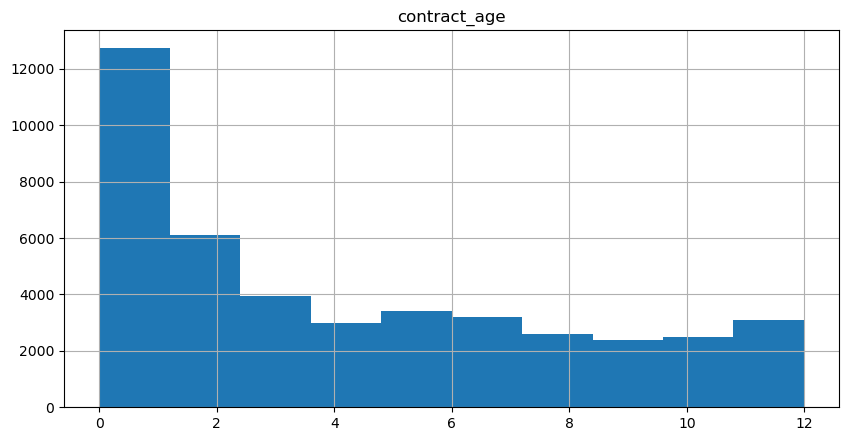

In [23]:
# plot distribution of contract tenure for cancelled contracts
df_canx_tenure = pd.DataFrame(filt_df1[filt_df1['contractstatuscode']=='C']['contract_age'])
df_canx_tenure.hist()

- Most people keep their contract to the end. Those who cancel tend to do it very early in the contract.

## Cancellation Rate

### Without Filter

In [26]:
df_month_raw = pd.DataFrame(raw_df.groupby(['startmonthyear']).agg({'cancelflag': lambda x: x.sum(),'offerreferencenumber': lambda x: x.count()})).reset_index()
df_month_raw.columns = ['startmonthyear','cancel_count', 'offers']
df_month_raw

,startmonthyear,cancel_count,offers
0,2021-01,11177,42867
1,2021-02,10189,39512
2,2021-03,10765,43562
3,2021-04,8939,37022
4,2021-05,8797,37282
5,2021-06,8983,38568
6,2021-07,8333,37624
7,2021-08,6745,31948
8,2021-09,6736,33569
9,2021-10,6304,32448


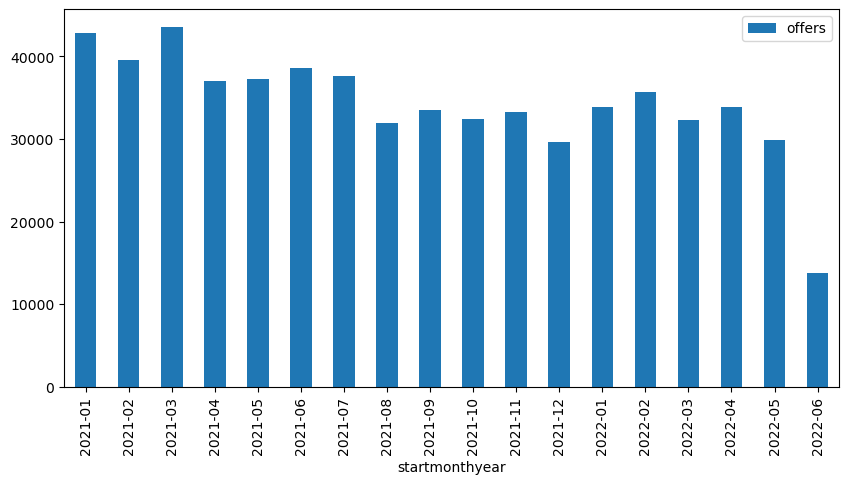

In [27]:
offer_df = df_month_raw[['startmonthyear', 'offers']]

ax = offer_df.plot.bar(x='startmonthyear', y='offers')

### With Filter

In [28]:
df_month = pd.DataFrame(filt_df1.groupby(['startmonthyear']).agg({'cancelflag': lambda x: x.sum(),'offerreferencenumber': lambda x: x.count()})).reset_index()

df_month.columns = ['startmonthyear','cancel_count', 'offers']
# df_month['cum_cancels'] = df_month['cancel_count'].cumsum()
# df_month['cum_offers'] = df_month['offers'].cumsum()
# df_month['cum_cancel_rate'] = df_month['cum_cancels']/df_month['cum_offers']
df_month['cancel_rate'] = df_month['cancel_count']/(df_month['offers'])
df_month

,startmonthyear,cancel_count,offers,cancel_rate
0,2021-01,11175,42865,0.260702
1,2021-02,10187,39508,0.257847
2,2021-03,10757,43554,0.246981
3,2021-04,8936,37015,0.241416
4,2021-05,8796,37281,0.235938


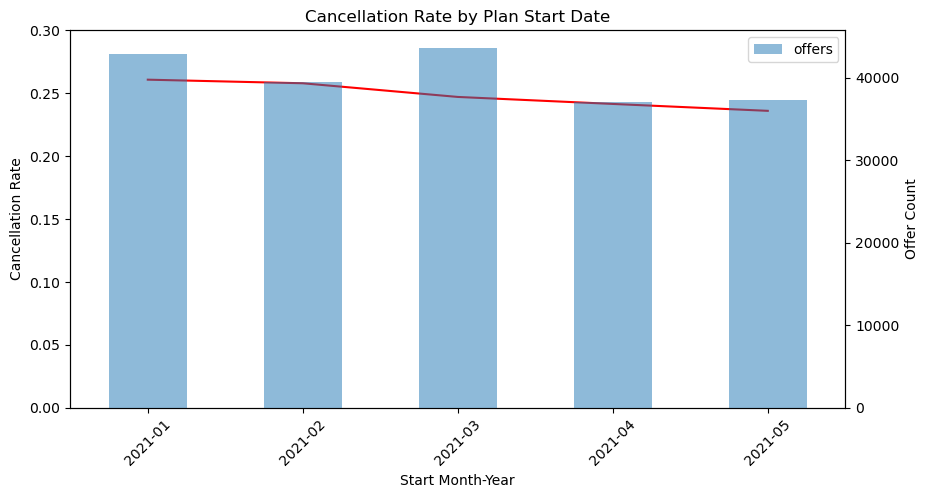

In [29]:
# Plot cancellation rate

y1 = df_month['cancel_rate']
y2 = df_month['offers']

x = df_month['startmonthyear']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(x, y1, color = 'red', label = 'Cancellation Rate')
y2.plot.bar(alpha=0.5)


# ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel("Start Month-Year")
ax1.set_ylabel("Cancellation Rate")
ax2.set_ylabel("Offer Count")
ax1.set_xticklabels(x, rotation=45)

ax1.set_xticklabels(x)
ax1.set_ylim([0, .3])

plt.legend()
plt.title('Cancellation Rate by Plan Start Date')

plt.show()

There's a decline in cancellation rate for the observed period which suggests one of the following:
- cancellation rate is declining in general
- plans that start later in the year are less likely to cancel